<a href="https://colab.research.google.com/github/EvertonVaz/IAExpert/blob/main/IAExpert_An%C3%A1lise_de_Dados_e_Machine_Learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
from scipy import stats

# Obter, tratar e visualizar os dados

## Base de dados das ações

In [2]:
acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']

In [3]:
carteira1 = pd.DataFrame()
for acao in acoes:
  carteira1[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']

In [4]:
carteira1.head()

,GOLL4.SA,CVCB3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,14.99,15.20,11.846153,0.232812,11.910702,47.259998
2015-01-05,14.85,15.00,11.926923,0.237187,11.544731,46.320000
2015-01-06,15.21,14.80,11.750000,0.234062,10.822770,46.580002
2015-01-07,14.55,14.67,11.615384,0.241875,10.746248,48.150002
2015-01-08,14.27,14.15,11.811538,0.240000,10.995774,48.509998


In [5]:
carteira1 = carteira1.rename(columns={'GOLL4.SA': 'GOL', 'CVCB3.SA': 'CVC', 'WEGE3.SA': 'WEGE',
                                    'MGLU3.SA': 'MGLU', 'TOTS3.SA': 'TOTS', 'BOVA11.SA': 'BOVA'})

carteira1.tail()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2021-01-15,23.520000,19.780001,87.720001,23.860001,28.309999,115.779999
2021-01-18,23.790001,20.160000,92.209999,24.450001,28.799999,116.686951
2021-01-19,23.240000,19.870001,89.599998,24.080000,29.520000,115.629997
2021-01-20,22.850000,19.820000,88.800003,25.420000,29.860001,115.070000
2021-01-21,22.660000,19.230000,87.230003,25.209999,29.840000,113.879997


In [6]:
carteira1.isnull().sum()

GOL     0
CVC     0
WEGE    0
MGLU    0
TOTS    0
BOVA    4
dtype: int64

In [7]:
carteira1.dropna(inplace=True)

In [8]:
carteira1.isnull().sum()

GOL     0
CVC     0
WEGE    0
MGLU    0
TOTS    0
BOVA    0
dtype: int64

In [9]:
carteira1.reset_index(inplace=True)

In [10]:
carteira1

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.200000,11.846153,0.232812,11.910702,47.259998
1,2015-01-05,14.850000,15.000000,11.926923,0.237187,11.544731,46.320000
2,2015-01-06,15.210000,14.800000,11.750000,0.234062,10.822770,46.580002
3,2015-01-07,14.550000,14.670000,11.615384,0.241875,10.746248,48.150002
4,2015-01-08,14.270000,14.150000,11.811538,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1493,2021-01-15,23.520000,19.780001,87.720001,23.860001,28.309999,115.779999
1494,2021-01-18,23.790001,20.160000,92.209999,24.450001,28.799999,116.686951
1495,2021-01-19,23.240000,19.870001,89.599998,24.080000,29.520000,115.629997
1496,2021-01-20,22.850000,19.820000,88.800003,25.420000,29.860001,115.070000


In [11]:
carteira1.describe()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000
mean,14.879793,32.362326,22.930419,5.323308,13.550131,73.072682
std,10.208461,16.059983,17.533751,6.947040,5.898586,20.776071
min,1.160000,6.490000,9.884615,0.030585,7.156402,36.450001
25%,6.892500,18.077500,12.704808,0.208544,9.832152,54.985000
50%,12.330000,27.965000,17.103847,2.457968,10.732940,72.000000
75%,20.987500,47.275000,22.215000,7.210625,15.153333,91.965000
max,43.790001,64.800003,92.209999,27.450001,31.070000,120.400002


## Visualizações dos dados

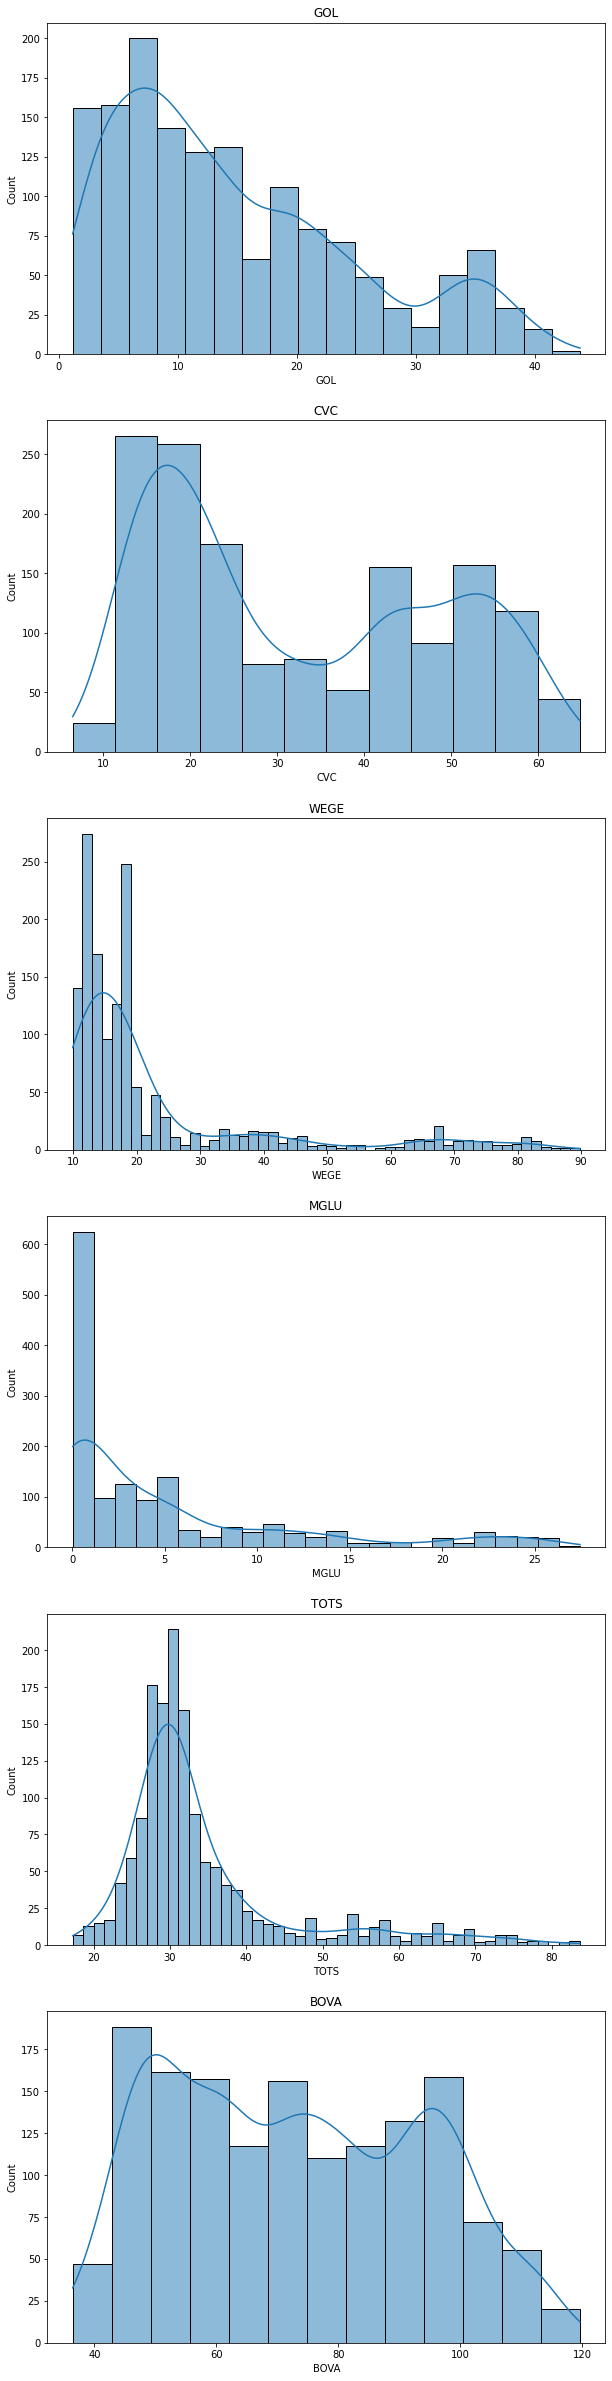

In [ ]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(carteira1.columns)):
  plt.subplot(7, 1, i + 1)
  sns.histplot(carteira1[carteira1.columns[i]], kde = True)
  plt.title(carteira1.columns[i])

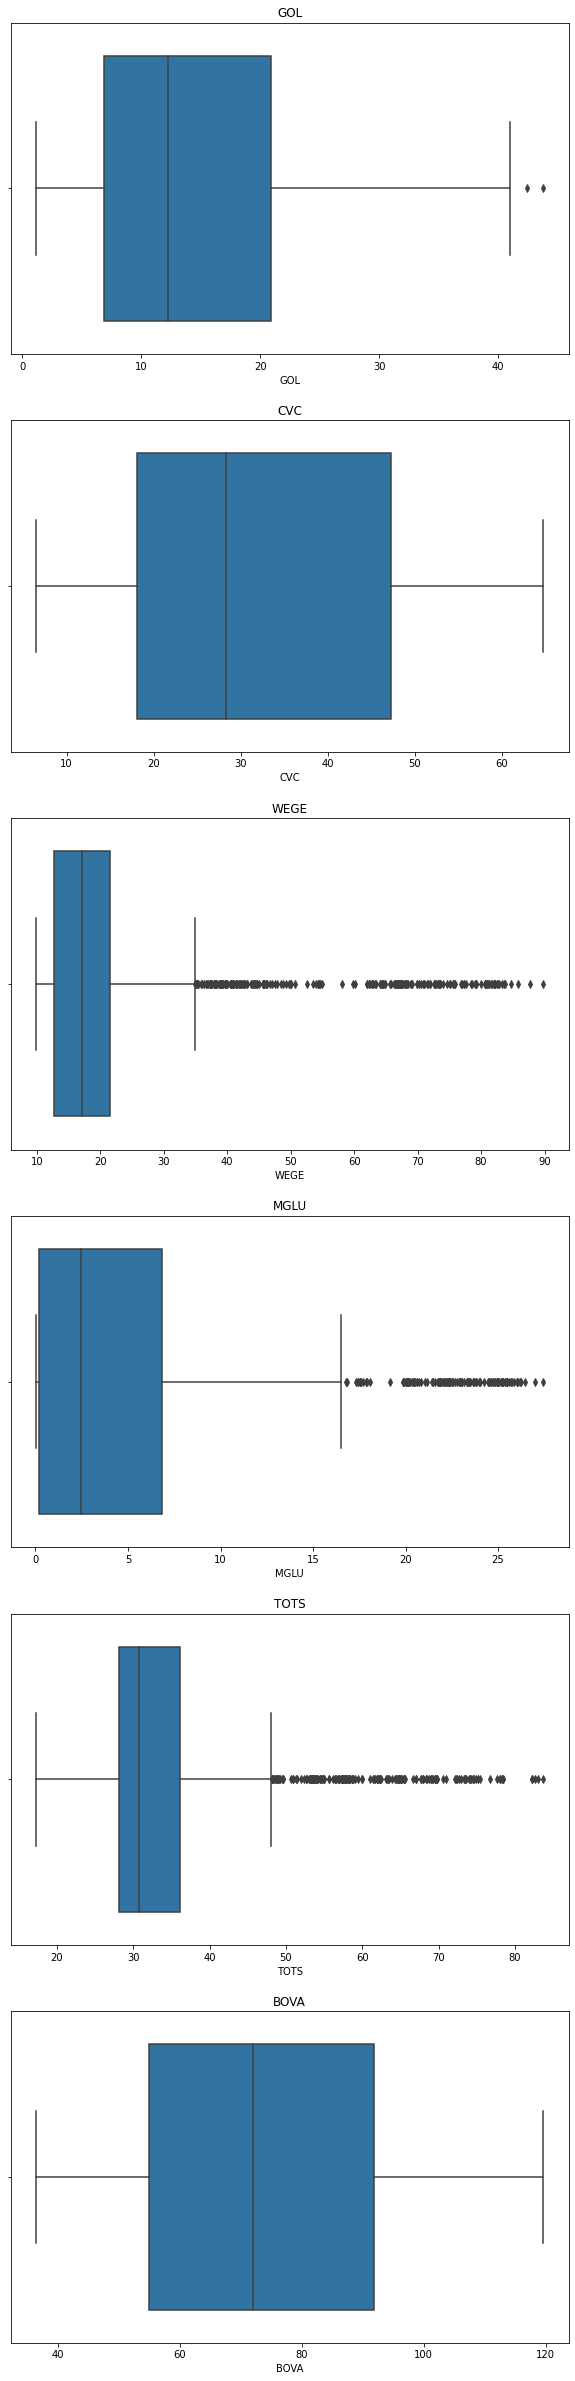

In [ ]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(carteira1.columns)):
  plt.subplot(7, 1, i + 1)
  sns.boxplot(x = carteira1[carteira1.columns[i]])
  plt.title(carteira1.columns[i])

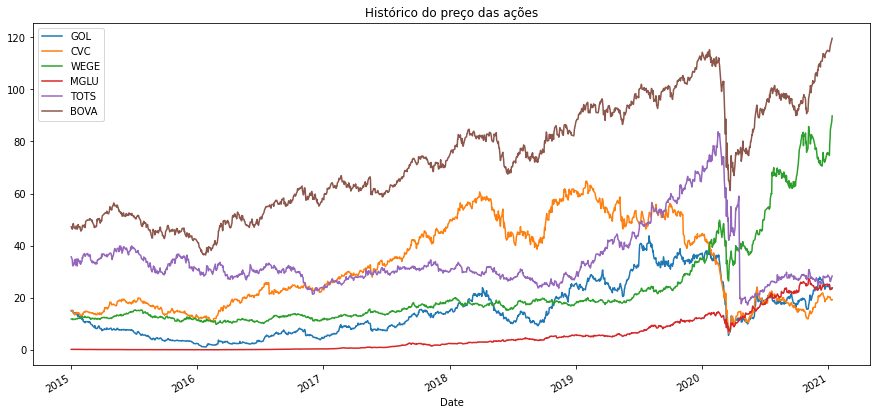

In [ ]:
carteira1.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações');

In [ ]:
carteira1_normalizado = carteira1.copy()
for i in carteira1_normalizado.columns[1:]:
  carteira1_normalizado[i] = carteira1_normalizado[i] / carteira1_normalizado[i][0]

In [ ]:
carteira1_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980519,1.038928,0.902235,1.018832
4,2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449
...,...,...,...,...,...,...,...
1485,2021-01-05,1.597732,1.330921,6.685714,106.351906,0.773254,2.437579
1486,2021-01-06,1.549033,1.340789,6.862988,100.767997,0.736592,2.461701
1487,2021-01-07,1.561041,1.286842,7.146624,99.479407,0.734633,2.475243
1488,2021-01-11,1.565043,1.253947,7.406624,100.982767,0.786128,2.519679


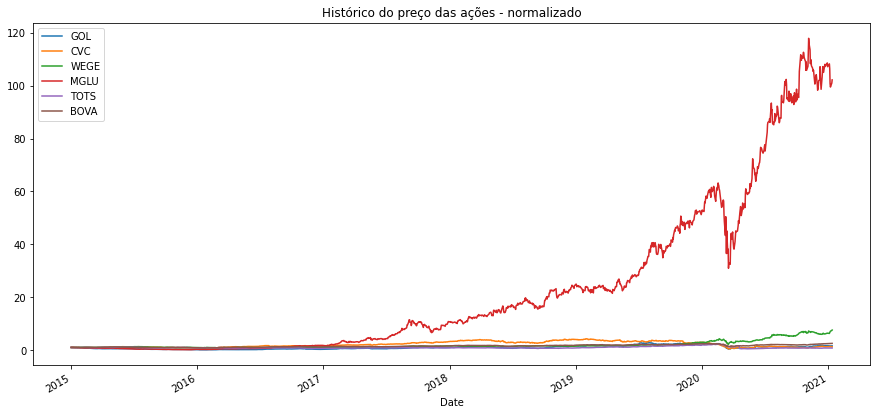

In [ ]:
carteira1_normalizado.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações - normalizado');

In [ ]:
figura = px.line(title = 'Histórico do preço das ações')
for i in carteira1.columns[1:]:
  figura.add_scatter(x = carteira1['Date'], y = carteira1[i], name = i)
figura.show()

In [ ]:
figura = px.line(title = 'Histórico do preço das ações')
for i in carteira1_normalizado.columns[1:]:
  figura.add_scatter(x = carteira1_normalizado['Date'], y = carteira1_normalizado[i], name = i)
figura.show()

#### Função para normalizar carteira

In [12]:
def normalizacao_carteira(carteira):
  normalizacao = carteira.copy()
  for col in normalizacao.columns[1:]:
    normalizacao[col] = normalizacao[col] / normalizacao[col][0]
  return normalizacao

teste_normalizacao = normalizacao_carteira(carteira1)
teste_normalizacao

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980519,1.038928,0.902235,1.018832
4,2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449
...,...,...,...,...,...,...,...
1493,2021-01-15,1.569046,1.301316,7.404936,102.486128,2.376854,2.449852
1494,2021-01-18,1.587058,1.326316,7.783961,105.020362,2.417993,2.469043
1495,2021-01-19,1.550367,1.307237,7.563637,103.431093,2.478443,2.446678
1496,2021-01-20,1.524350,1.303947,7.496105,109.186811,2.506989,2.434829


## Exercicios
Agora que você aprendeu como realizar algumas análises iniciais e geração de gráficos, o objetivo é gerar outra base de dados com outras empresas de outros setores da economia. Essa nova base será utilizada na maioria dos outros exercícios, pois o objetivo será comparar as métricas financeiras utilizando as duas carteiras de investimentos. Qual será a mais rentável?

Criar uma nova base com as seguintes empresas:

- Ambev
- Odontoprev
- Vivo
- Petrobrás
- Banco do Brasil

O índice IBOVESPA, assim como para a base de dados anterior
Você também pode escolher outras empresas ao seu critério, pois não vai influenciar na codificação. Na próxima aula você pode assistir o vídeo com a solução

Bom trabalho!

Jones

In [ ]:
acoes_ex = ['ABEV3.SA', 'ODPV3.SA', 'VIVT3.SA', 'PETR3.SA', 'BBAS3.SA', 'BOVA11.SA']

In [ ]:
carteira2 = pd.DataFrame()
for acao in acoes_ex:
  carteira2[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']

In [ ]:
carteira2.head()

,ABEV3.SA,ODPV3.SA,VIVT3.SA,PETR3.SA,BBAS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,16.020000,9.37,37.820000,9.00,22.650000,47.259998
2015-01-05,15.730000,9.62,37.070000,8.27,22.180000,46.320000
2015-01-06,16.330000,9.55,36.150002,8.06,22.490000,46.580002
2015-01-07,16.559999,9.69,37.389999,8.45,23.480000,48.150002
2015-01-08,16.540001,9.66,38.910000,9.02,23.559999,48.509998


In [ ]:
carteira2.isnull().sum()

ABEV3.SA     0
ODPV3.SA     0
VIVT3.SA     0
PETR3.SA     0
BBAS3.SA     0
BOVA11.SA    4
dtype: int64

In [ ]:
carteira2.dropna(inplace=True)
carteira2.isnull().sum()

ABEV3.SA     0
ODPV3.SA     0
VIVT3.SA     0
PETR3.SA     0
BBAS3.SA     0
BOVA11.SA    0
dtype: int64

In [ ]:
carteira2.rename(columns={'ABEV3.SA': 'AMBEV', 'ODPV3.SA': 'ODONTOPREV', 'VIVT3.SA': 'VIVO',
                                          'PETR3.SA': 'PETROBRAS', 'BBAS3.SA': 'BBRASIL', 'BOVA11.SA': 'BOVA'}, inplace=True)
carteira2.tail()

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
Date,,,,,,
2021-01-04,15.480000,15.17,45.939999,29.50,37.590000,114.480003
2021-01-05,15.810000,15.45,45.549999,30.40,37.200001,115.199997
2021-01-06,16.129999,15.17,45.040001,30.75,38.049999,116.339996
2021-01-07,16.049999,14.30,43.900002,31.65,39.560001,116.980003
2021-01-08,16.530001,14.58,45.049999,31.59,39.790001,120.400002


In [ ]:
carteira2.reset_index(inplace=True)
carteira2.describe()

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
count,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000
mean,18.058180,13.366837,40.746273,19.231995,32.285648,72.807905
std,2.452581,2.308141,5.207374,7.519313,10.871054,20.556100
min,11.030000,9.000000,28.980000,5.910000,12.700000,36.450001
25%,17.059999,11.340000,36.820000,13.520000,23.580000,54.930000
50%,18.450001,13.210000,40.849998,17.690001,31.150000,71.930000
75%,19.320000,15.380000,44.009998,26.389999,39.750000,91.830002
max,24.270000,18.430000,56.740002,33.450001,55.180000,120.400002


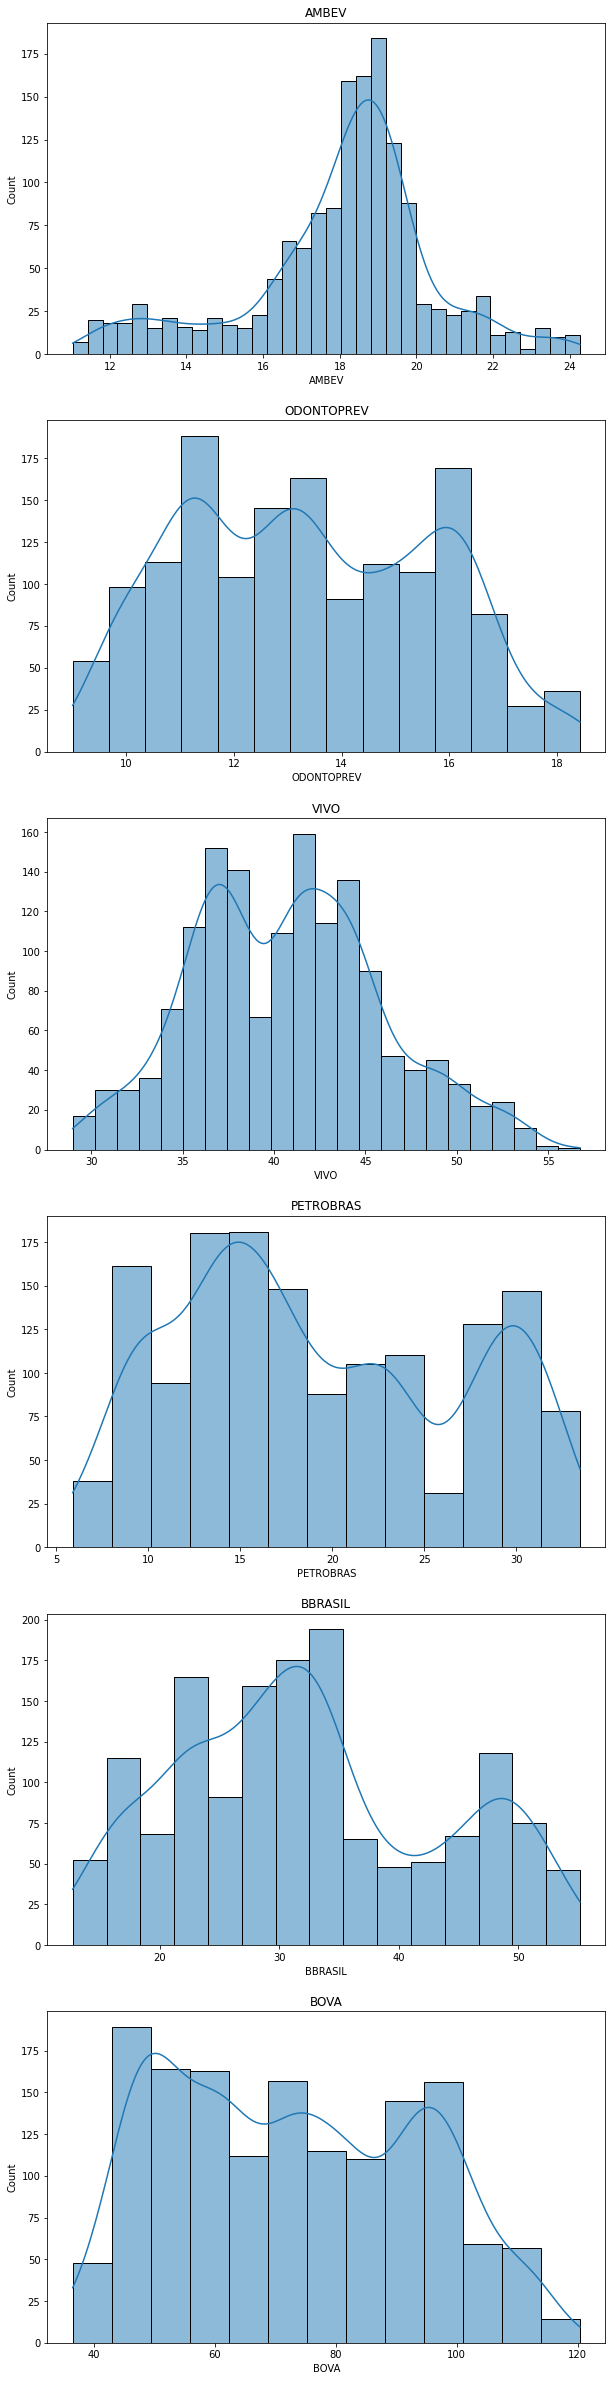

In [ ]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(carteira2.columns)):
  plt.subplot(7, 1, i + 1)
  sns.histplot(carteira2[carteira2.columns[i]], kde = True)
  plt.title(carteira2.columns[i])

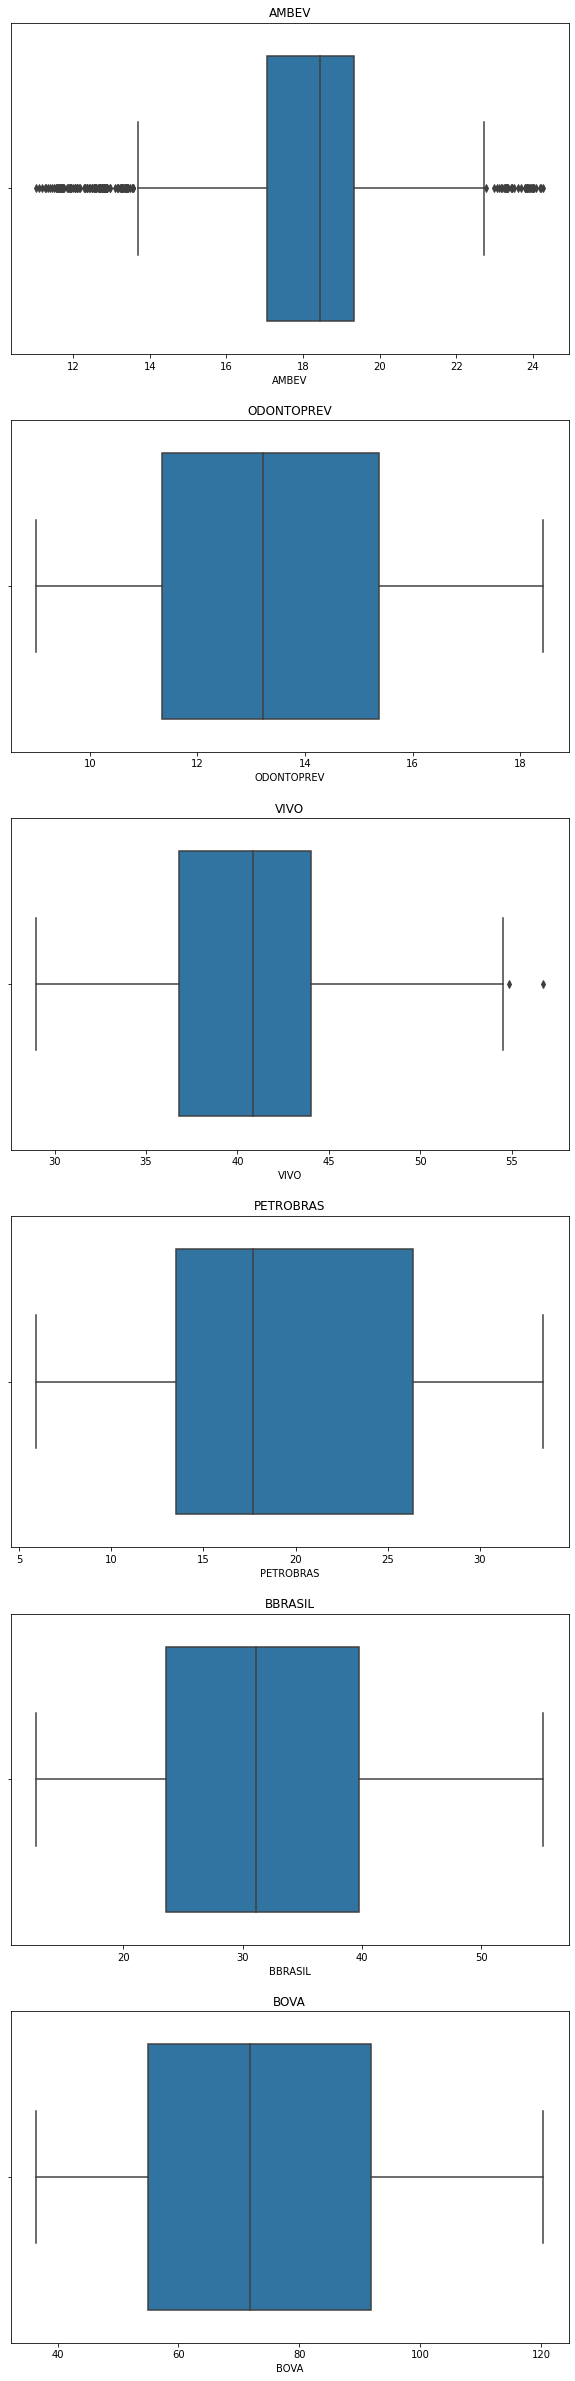

In [ ]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(carteira2.columns)):
  plt.subplot(7, 1, i + 1)
  sns.boxplot(x = carteira2[carteira2.columns[i]])
  plt.title(carteira2.columns[i])

In [ ]:
figura = px.line(title = 'Histórico do preço das ações')
for i in carteira2.columns[1:]:
  figura.add_scatter(x = carteira2['Date'], y = carteira2[i], name = i)
figura.show()

In [ ]:
carteira2_normalizada = carteira2.copy()
for i in carteira2_normalizada.columns[1:]:
  carteira2_normalizada[i] = carteira2_normalizada[i] / carteira2_normalizada[i][0]

In [ ]:
carteira2_normalizada

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.981898,1.026681,0.980169,0.918889,0.979249,0.980110
2,2015-01-06,1.019351,1.019210,0.955844,0.895556,0.992936,0.985612
3,2015-01-07,1.033708,1.034152,0.988630,0.938889,1.036645,1.018832
4,2015-01-08,1.032459,1.030950,1.028821,1.002222,1.040177,1.026449
...,...,...,...,...,...,...,...
1484,2021-01-04,0.966292,1.618997,1.214701,3.277778,1.659603,2.422345
1485,2021-01-05,0.986891,1.648879,1.204389,3.377778,1.642384,2.437579
1486,2021-01-06,1.006866,1.618997,1.190904,3.416667,1.679912,2.461701
1487,2021-01-07,1.001873,1.526147,1.160762,3.516667,1.746578,2.475243


In [ ]:
figura = px.line(title = 'Histórico do preço das ações - normalizado')
for i in carteira2_normalizada.columns[1:]:
  figura.add_scatter(x = carteira2_normalizada['Date'], y = carteira2_normalizada[i], name = i)
figura.show()

# Taxa de retorno dos ativos




In [ ]:
carteira1

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.200000,11.846153,0.232812,35.732109,47.259998
1,2015-01-05,14.850000,15.000000,11.926923,0.237187,34.634193,46.320000
2,2015-01-06,15.210000,14.800000,11.750000,0.234062,32.468311,46.580002
3,2015-01-07,14.550000,14.670000,11.615384,0.241875,32.238747,48.150002
4,2015-01-08,14.270000,14.150000,11.811538,0.240000,32.987324,48.509998
...,...,...,...,...,...,...,...
1484,2021-01-04,23.959999,20.170000,74.620003,25.200001,27.760000,114.480003
1485,2021-01-05,23.950001,20.230000,79.199997,24.760000,27.629999,115.199997
1486,2021-01-06,23.219999,20.379999,81.300003,23.459999,26.320000,116.339996
1487,2021-01-07,23.400000,19.559999,84.660004,23.160000,26.250000,116.980003


## Taxa de retorno simples

Para comparar ações diferentes esse e o calculo indicado

formula:

Ex.1:
- RS = ((preço final - preço inicial) / preço inicial) * 100

Ex.2:
- RS = (preco final / preco inicial - 1) * 100



```
PS.: 
preço inicial = preço de compra
preço final = preço de venda
```

In [ ]:
# preço inicial
pinicial = carteira1.GOL.iloc[0]
pinicial

14.989999771118164

In [ ]:
# preço final
pfinal = carteira1.GOL.iloc[-1]
pfinal

23.510000228881836

In [ ]:
# formula
((pfinal - pinicial) / pinicial) * 100

56.83789584960167

#### Função para calcular o retorno simples

In [13]:
def retorno_simples(df, acao):
  acao = acao.upper()
  return round(((df[acao].iloc[-1] - df[acao].iloc[0]) / df[acao].iloc[0]) * 100,2)

retorno_simples(carteira1, 'GOL')

51.17

In [14]:
def retorno_simples(df, acao):
  acao = acao.upper()
  return round((df[acao].iloc[-1] / df[acao].iloc[0] - 1)  * 100,2)

retorno_simples(carteira1, 'GOL')

51.17

In [15]:
retorno_simples(carteira1, 'WEGE')

636.36

In [16]:
retorno_simples(carteira1, 'mglu')

10728.48

## Taxa de retorno diaria, mensal e anual

In [ ]:
retorno_diario = pd.DataFrame()
retorno_diario['Date'] = carteira1.Date.copy()
for col in carteira1.columns[1:]:
  retorno_diario[col] = (carteira1[col] / carteira1[col].shift(1) - 1) * 100


retorno_diario

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,-0.933952,-1.315788,0.681821,1.879197,-3.072630,-1.988994
2,2015-01-06,2.424240,-1.333332,-1.483390,-1.317525,-6.253595,0.561317
3,2015-01-07,-4.339249,-0.878379,-1.145667,3.338001,-0.707042,3.370545
4,2015-01-08,-1.924397,-3.544652,1.688740,-0.775193,2.321980,0.747657
...,...,...,...,...,...,...,...
1484,2021-01-04,-3.929436,-1.992225,-1.478737,1.002004,-3.342615,-0.408868
1485,2021-01-05,-0.041729,0.297469,6.137757,-1.746034,-0.468304,0.628925
1486,2021-01-06,-3.048023,0.741471,2.651523,-5.250408,-4.741222,0.989583
1487,2021-01-07,0.775195,-4.023551,4.132842,-1.278769,-0.265956,0.550118


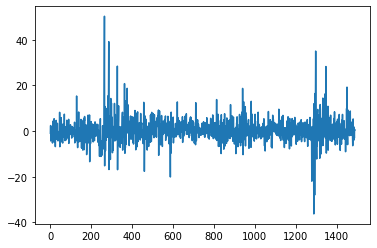

In [ ]:
# Visualizar os retornos diarios da ação
retorno_diario.GOL.plot();

In [ ]:
# Média dos retornos diarios das ações
retorno_diario.iloc[:, 1:].mean().round(2)

GOL     0.16
CVC     0.08
WEGE    0.16
MGLU    0.40
TOTS    0.04
BOVA    0.08
dtype: float64

In [ ]:
# Temos em media 20 dias uteis nos meses
dais_mes = 20
carteira1.Date[0:dais_mes+1]

0    2015-01-02
1    2015-01-05
2    2015-01-06
3    2015-01-07
4    2015-01-08
5    2015-01-09
6    2015-01-12
7    2015-01-13
8    2015-01-14
9    2015-01-15
10   2015-01-16
11   2015-01-19
12   2015-01-20
13   2015-01-21
14   2015-01-22
15   2015-01-23
16   2015-01-26
17   2015-01-27
18   2015-01-28
19   2015-01-29
20   2015-01-30
Name: Date, dtype: datetime64[ns]

In [ ]:
# Temos em media 245 dias uteis em um ano
dias_ano = 245
carteira1.Date[0:dias_ano+1]

0     2015-01-02
1     2015-01-05
2     2015-01-06
3     2015-01-07
4     2015-01-08
         ...    
241   2015-12-22
242   2015-12-23
243   2015-12-28
244   2015-12-29
245   2015-12-30
Name: Date, Length: 246, dtype: datetime64[ns]

In [ ]:
# Exemplo do calculo
  # retorno mensal
mensal = round(retorno_diario.iloc[:, 1:].mean() * dais_mes, 2)

  # retorno anual
anual = round(retorno_diario.iloc[:, 1:].mean() * dias_ano, 2)

mensal

GOL     3.19
CVC     1.59
WEGE    3.22
MGLU    7.93
TOTS    0.85
BOVA    1.56
dtype: float64

In [ ]:
anual

GOL     39.11
CVC     19.45
WEGE    39.50
MGLU    97.15
TOTS    10.43
BOVA    19.05
dtype: float64

#### Função para calcular o retorno diario

In [17]:
# Calcula o retorno diario em %
def retorno_diario(carteira):
  retorno = pd.DataFrame()  
  for col in carteira.columns[1:]:
    retorno[col] = (carteira[col] / carteira[col].shift(1) - 1) * 100
  retorno.index = carteira.Date
  retorno.dropna(inplace=True)
  return retorno

teste_retorno = retorno_diario(carteira1)
teste_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2015-01-05,-0.933952,-1.315788,0.681821,1.879197,-3.072620,-1.988994
2015-01-06,2.424240,-1.333332,-1.483390,-1.317525,-6.253598,0.561317
2015-01-07,-4.339249,-0.878379,-1.145667,3.338001,-0.707045,3.370545
2015-01-08,-1.924397,-3.544652,1.688740,-0.775193,2.321983,0.747657
2015-01-09,-1.541698,-1.060068,-0.455871,-3.385414,-1.028742,-2.020201
...,...,...,...,...,...,...
2021-01-15,-2.809919,-2.896417,-2.392346,0.547834,0.461317,-2.730404
2021-01-18,1.147961,1.921128,5.118557,2.472758,1.730836,0.783341
2021-01-19,-2.311900,-1.438487,-2.830496,-1.513296,2.500004,-0.905803


## Taxa de retorno logarítimica

Para comparações da mesma ação em periodos diferentes esse calculo é indicado

RL = log(preço final / preço inicial) * 100

In [ ]:
# Exemplo
np.log(pfinal / pinicial) * 100

45.004257544195006

In [ ]:
for col in carteira1.columns[1:]:
  print(f'{col}: {round(np.log(carteira1[col].iloc[-1] / carteira1[col].iloc[0]) * 100, 2)}')


CVC: 23.98
WEGE: 203.7
MGLU: 462.93
TOTS: 87.53
BOVA: 91.2


In [ ]:
carteira1

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.200000,11.846153,0.232812,11.910702,47.259998
1,2015-01-05,14.850000,15.000000,11.926923,0.237187,11.544731,46.320000
2,2015-01-06,15.210000,14.800000,11.750000,0.234062,10.822770,46.580002
3,2015-01-07,14.550000,14.670000,11.615384,0.241875,10.746248,48.150002
4,2015-01-08,14.270000,14.150000,11.811538,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1488,2021-01-08,23.389999,19.480000,89.779999,23.840000,27.510000,120.400002
1489,2021-01-11,23.360001,19.080000,87.029999,23.490000,27.950001,119.080002
1490,2021-01-12,24.280001,19.639999,90.070000,24.200001,28.670000,119.209999
1491,2021-01-13,23.379999,19.370001,90.900002,23.920000,28.709999,117.839996


#### Função para calcular o retorno anual log

In [18]:
def retorno_log_anual(carteira):
  carteira = carteira1.copy()
  carteira.set_index(['Date'], inplace=True)  
  anos = sorted(list(set(carteira.index.year)))
  retorno_anual_log = {}
  for ano in anos:  
    for col in carteira.columns:
      aux = carteira.loc[str(ano), col]      
      retorno_anual_log[ano, col] =  round(np.log(aux.iloc[-1] / aux.iloc[0]) * 100, 2)
      
          
      
  retorno_anual_log = pd.DataFrame(pd.DataFrame(retorno_anual_log, index=np.arange(len(anos))).T[0])
  retorno_anual_log.reset_index(inplace=True)
  retorno_anual_log.rename(columns={0: 'retorno', 'level_0': 'ano', 'level_1':'acao'}, inplace=True)
  retorno_anual_log.set_index(['ano'], inplace=True)
  return retorno_anual_log

retorno_log_anual(carteira1)

,acao,retorno
ano,,
2015,GOL,-178.31
2015,CVC,-11.86
2015,WEGE,-2.97
2015,MGLU,-121.69
2015,TOTS,-14.30
2015,BOVA,-11.49
2016,GOL,65.08
2016,CVC,63.73
2016,WEGE,5.71


In [ ]:
def retorno_log_anual(carteira):
  carteira = carteira1.copy()
  carteira.set_index(['Date'], inplace=True)  
  anos = sorted(list(set(carteira.index.year)))
  retorno_anual_log = {}
  df = pd.DataFrame()
  n = 0
  filtro = []
  for ano in anos:
    if n <= 1:      
      filtro.append(n)
      n+=1
    else: 
      n+=6
      filtro.append(n)
    
    for col in carteira.columns:
      aux = carteira.loc[str(ano), col]
      retorno_anual_log['ano'] = ano
      retorno_anual_log[col] = round(np.log(aux.iloc[-1] / aux.iloc[0]) * 100, 2)
      df = df.append(retorno_anual_log, ignore_index=True)      
  
  df = df.dropna().set_index(['ano'])
  df = df.iloc[filtro]
  return df

retorno_log_anual(carteira1)  

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
ano,,,,,,
2015.0,-178.31,-11.86,-2.97,-121.69,-14.30,-11.49
2016.0,65.08,-11.86,-2.97,-121.69,-14.30,-11.49
2017.0,117.47,74.52,5.71,177.75,-24.42,34.86
2018.0,50.22,20.42,46.79,184.21,23.67,24.76
2019.0,36.88,-33.29,-9.28,82.56,-10.48,11.91
2020.0,-39.90,-77.59,65.63,71.87,81.42,23.54
2021.0,-2.07,-0.95,76.51,70.46,21.99,0.62


## Taxa de retorno da carteira

In [ ]:
# Normalizar a carteira
carteira_normalizada = normalizacao_carteira(carteira1)

carteira_normalizada.set_index(['Date'], inplace=True)
carteira_normalizada

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
2015-01-07,0.970647,0.965132,0.980519,1.038928,0.902235,1.018832
2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449
...,...,...,...,...,...,...
2021-01-05,1.597732,1.330921,6.685714,106.351906,0.773254,2.437579
2021-01-06,1.549033,1.340789,6.862988,100.767997,0.736592,2.461701
2021-01-07,1.561041,1.286842,7.146624,99.479407,0.734633,2.475243


In [ ]:
figura = px.line(title = 'retorno das ações')
for i in carteira_normalizada.columns[1:]:
  figura.add_scatter(x = carteira_normalizada.index, y = carteira_normalizada[i], name = i)
figura.show()

In [ ]:
retorno_diario_carteira = retorno_diario(carteira1)

retorno_diario_carteira

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2015-01-05,-0.933952,-1.315788,0.681821,1.879197,-3.072630,-1.988994
2015-01-06,2.424240,-1.333332,-1.483390,-1.317525,-6.253595,0.561317
2015-01-07,-4.339249,-0.878379,-1.145667,3.338001,-0.707042,3.370545
2015-01-08,-1.924397,-3.544652,1.688740,-0.775193,2.321980,0.747657
2015-01-09,-1.541698,-1.060068,-0.455871,-3.385414,-1.028745,-2.020201
...,...,...,...,...,...,...
2021-01-05,-0.041729,0.297469,6.137757,-1.746034,-0.468304,0.628925
2021-01-06,-3.048023,0.741471,2.651523,-5.250408,-4.741222,0.989583
2021-01-07,0.775195,-4.023551,4.132842,-1.278769,-0.265956,0.550118


In [ ]:
#retornos anuais da carteira
  #Exemplo
retorno_diario_carteira[:'2015'].mean() * len(retorno_diario_carteira[:'2015'])

GOL    -161.884191
CVC      -5.662616
WEGE      0.813645
MGLU    -90.831765
TOTS     -7.373166
BOVA     -8.798255
dtype: float64

In [ ]:
def retorno_anual(carteira):  
  retorno_dia = retorno_diario(carteira)
  anos = sorted(list(set(retorno_dia.index.year)))
  for ano in anos:
    print(ano)
    print(retorno_dia[str(ano):str(ano)].mean() * len(retorno_dia[str(ano):str(ano)]), end='\n\n')
    

retorno_anual(carteira1)

2015
GOL    -161.884191
CVC      -5.662616
WEGE      0.813645
MGLU    -90.831765
TOTS     -7.373152
BOVA     -8.798255
dtype: float64

2016
GOL     122.956616
CVC      64.020921
WEGE      8.961636
MGLU    206.121873
TOTS    -19.519549
BOVA     36.032734
dtype: float64

2017
GOL     131.726766
CVC      75.847252
WEGE     47.489529
MGLU    205.030784
TOTS     25.465418
BOVA     25.732613
dtype: float64

2018
GOL     74.934704
CVC     30.941539
WEGE    -1.557460
MGLU    92.662601
TOTS    -4.977461
BOVA    16.129466
dtype: float64

2019
GOL     49.672967
CVC    -26.001447
WEGE    71.412142
MGLU    82.752664
TOTS    91.556047
BOVA    29.030706
dtype: float64

2020
GOL     25.926909
CVC    -15.813166
WEGE    95.305335
MGLU    98.651727
TOTS    47.082040
BOVA    12.902535
dtype: float64

2021
GOL     -6.430503
CVC     -6.133538
WEGE    18.764896
MGLU    -4.228947
TOTS    -0.156567
BOVA     2.387274
dtype: float64



In [ ]:
anos = sorted(list(set(retorno_diario_carteira.index.year)))

for ano in anos:
  print(ano)
  print(retorno_diario_carteira[str(ano):str(ano)].mean() * len(retorno_diario_carteira[str(ano):str(ano)]), end='\n\n')

2015
GOL    -161.884191
CVC      -5.662616
WEGE      0.813645
MGLU    -90.831765
TOTS     -7.373166
BOVA     -8.798255
dtype: float64

2016
GOL     122.956616
CVC      64.020921
WEGE      8.961636
MGLU    206.121873
TOTS    -19.519540
BOVA     36.032734
dtype: float64

2017
GOL     131.726766
CVC      75.847252
WEGE     47.489529
MGLU    205.030784
TOTS     25.465424
BOVA     25.732613
dtype: float64

2018
GOL     74.934704
CVC     30.941539
WEGE    -1.557460
MGLU    92.662601
TOTS    -4.977469
BOVA    16.129466
dtype: float64

2019
GOL     49.672967
CVC    -26.001447
WEGE    71.412142
MGLU    82.752664
TOTS    91.556045
BOVA    29.030706
dtype: float64

2020
GOL     25.926909
CVC    -15.813166
WEGE    95.310873
MGLU    98.665850
TOTS   -19.655044
BOVA    12.902535
dtype: float64

2021
GOL     -5.773905
CVC     -5.232456
WEGE    17.491099
MGLU    -4.337109
TOTS    -2.151430
BOVA     4.683333
dtype: float64



## Taxa de retorno com pesos para as ações

In [ ]:
# supondo que a carteira tenha os mesmos pesos

pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0])
print(f'soma dos pesos = {pesos.sum()}', end='\n\n')

for ano in anos: 
  retorno_anual = retorno_diario_carteira[str(ano):str(ano)].mean() * len(retorno_diario_carteira[str(ano):str(ano)])
  print(f'retorno de {ano} -> {np.dot(retorno_anual, pesos).round(3)}', end='\n\n')

soma dos pesos = 1.0

retorno de 2015 -> -52.988

retorno de 2016 -> 76.508

retorno de 2017 -> 97.112

retorno de 2018 -> 38.401

retorno de 2019 -> 53.878

retorno de 2020 -> 36.887

retorno de 2021 -> -0.001



In [ ]:
# vamos simular com outros pesos

pesos = np.array([0.2, 0.2, 0.4, 0.1, 0.1, 0])
print(f'soma dos pesos = {pesos.sum()}', end='\n\n')

for ano in anos: 
  retorno_anual = retorno_diario_carteira[str(ano):str(ano)].mean() * len(retorno_diario_carteira[str(ano):str(ano)])
  print(f'retorno de {ano} -> {np.dot(retorno_anual, pesos).round(3)}', end='\n\n')

soma dos pesos = 1.0

retorno de 2015 -> -43.004

retorno de 2016 -> 59.64

retorno de 2017 -> 83.56

retorno de 2018 -> 29.321

retorno de 2019 -> 50.73

retorno de 2020 -> 48.048

retorno de 2021 -> 4.146



## Comparativo Carteira x IBOVESPA

In [ ]:
carteira_normalizada['carteira'] = (carteira_normalizada.iloc[:, 0] + carteira_normalizada.iloc[:, 1] + carteira_normalizada.iloc[:, 2] + carteira_normalizada.iloc[:, 3] + carteira_normalizada.iloc[:, 4]) / 5
carteira_normalizada

,GOL,CVC,WEGE,MGLU,TOTS,BOVA,carteira
Date,,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110,0.994477
2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612,0.978854
2015-01-07,0.970647,0.965132,0.980519,1.038928,0.902235,1.018832,0.971492
2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449,0.966805
...,...,...,...,...,...,...,...
2021-01-04,1.598399,1.326974,6.299091,108.241845,0.776892,2.422345,23.648640
2021-01-05,1.597732,1.330921,6.685714,106.351906,0.773254,2.437579,23.347906
2021-01-06,1.549033,1.340789,6.862988,100.767997,0.736592,2.461701,22.251480


In [ ]:
figura = px.line(title = 'Comparativo Carteira x BOVA')
for i in carteira_normalizada.columns[5:]:
  figura.add_scatter(x = carteira_normalizada.index, y = carteira_normalizada[i], name = i)
figura.show()

## Exercício
No exercício do primeiro módulo nós geramos outra base de dados com outras empresas de outros setores da economia, com o intuito de comparar os resultados da primeira carteira de ações com a segunda carteira de ações. Portanto, o objetivo deste exercício é calcular a taxa de retorno e também gerar o gráfico comparando a carteira com o índice IBOVESPA. Você pode seguir exatamente o mesmo código implementado passo a passo

Na próxima aula, você pode assistir o vídeo com a solução

Bom trabalho!

Jones

In [ ]:
carteira2_normalizada = carteira2.copy()
for i in carteira2_normalizada.columns[1:]:
  carteira2_normalizada[i] = carteira2_normalizada[i] / carteira2_normalizada[i][0]

carteira2_normalizada.set_index(['Date'], inplace=True)
carteira2_normalizada

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
Date,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.981898,1.026681,0.980169,0.918889,0.979249,0.980110
2015-01-06,1.019351,1.019210,0.955844,0.895556,0.992936,0.985612
2015-01-07,1.033708,1.034152,0.988630,0.938889,1.036645,1.018832
2015-01-08,1.032459,1.030950,1.028821,1.002222,1.040177,1.026449
...,...,...,...,...,...,...
2021-01-04,0.966292,1.618997,1.214701,3.277778,1.659603,2.422345
2021-01-05,0.986891,1.648879,1.204389,3.377778,1.642384,2.437579
2021-01-06,1.006866,1.618997,1.190904,3.416667,1.679912,2.461701


In [ ]:
retorno_diario_carteira2 = ((carteira2_normalizada / carteira2_normalizada.shift(1)) - 1) * 100
retorno_diario_carteira2.dropna(inplace=True)
retorno_diario_carteira2

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
Date,,,,,,
2015-01-05,-1.810243,2.668090,-1.983078,-8.111106,-2.075052,-1.988994
2015-01-06,3.814370,-0.727648,-2.481786,-2.539299,1.397653,0.561317
2015-01-07,1.408448,1.465962,3.430146,4.838702,4.401955,3.370545
2015-01-08,-0.120764,-0.309595,4.065259,6.745570,0.340715,0.747657
2015-01-09,-0.241843,2.173913,-1.593418,2.993342,-4.329366,-2.020201
...,...,...,...,...,...,...
2021-01-04,-1.086262,4.261168,-1.204304,2.253032,-3.118554,-0.408868
2021-01-05,2.131789,1.845746,-0.848932,3.050846,-1.037508,0.628925
2021-01-06,2.024027,-1.812296,-1.119645,1.151317,2.284942,0.989583


In [ ]:
# Retorno anual
anos = sorted(list(set(retorno_diario_carteira2.index.year)))

for ano in anos:
  print(ano)
  print(retorno_diario_carteira2[str(ano):str(ano)].mean() * len(retorno_diario_carteira2[str(ano):str(ano)]), end='\n\n')

2015
AMBEV         13.127881
ODONTOPREV     4.225864
VIVO          -5.008860
PETROBRAS     14.029649
BBRASIL      -31.595987
BOVA          -8.798255
dtype: float64

2016
AMBEV         -6.112101
ODONTOPREV    34.533184
VIVO          13.216574
PETROBRAS     86.218939
BBRASIL       80.349380
BOVA          36.032734
dtype: float64

2017
AMBEV         27.479213
ODONTOPREV    27.742967
VIVO          15.782427
PETROBRAS      5.064397
BBRASIL       19.743981
BOVA          25.732613
dtype: float64

2018
AMBEV        -30.115153
ODONTOPREV   -10.333246
VIVO           3.583217
PETROBRAS     52.540753
BBRASIL       46.215401
BOVA          16.129466
dtype: float64

2019
AMBEV         22.868133
ODONTOPREV    23.622848
VIVO          19.916555
PETROBRAS     27.301621
BBRASIL       17.337442
BOVA          29.030706
dtype: float64

2020
AMBEV         -6.692769
ODONTOPREV    -5.958442
VIVO           3.735744
PETROBRAS     17.083229
BBRASIL      -11.967601
BOVA          12.902535
dtype: float64

2021
AMBEV

In [ ]:
# Retorno anual com os pesos (supondo que as ações tenham os mesmos pesos)

pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0])
print(f'soma dos pesos = {pesos.sum()}', end='\n\n')

for ano in anos: 
  retorno_anual = retorno_diario_carteira2[str(ano):str(ano)].mean() * len(retorno_diario_carteira2[str(ano):str(ano)])
  print(f'retorno de {ano} -> {np.dot(retorno_anual, pesos).round(3)}', end='\n\n')

soma dos pesos = 1.0

retorno de 2015 -> -1.044

retorno de 2016 -> 41.641

retorno de 2017 -> 19.163

retorno de 2018 -> 12.378

retorno de 2019 -> 22.209

retorno de 2020 -> -0.76

retorno de 2021 -> 2.974



In [ ]:
carteira2_normalizada['carteira'] = (carteira2_normalizada.iloc[:, 0] + carteira2_normalizada.iloc[:, 1] + carteira2_normalizada.iloc[:, 2] + carteira2_normalizada.iloc[:, 3] + carteira2_normalizada.iloc[:, 4]) / 5
carteira2_normalizada

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA,carteira
Date,,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.981898,1.026681,0.980169,0.918889,0.979249,0.980110,0.977377
2015-01-06,1.019351,1.019210,0.955844,0.895556,0.992936,0.985612,0.976579
2015-01-07,1.033708,1.034152,0.988630,0.938889,1.036645,1.018832,1.006405
2015-01-08,1.032459,1.030950,1.028821,1.002222,1.040177,1.026449,1.026926
...,...,...,...,...,...,...,...
2021-01-04,0.966292,1.618997,1.214701,3.277778,1.659603,2.422345,1.747474
2021-01-05,0.986891,1.648879,1.204389,3.377778,1.642384,2.437579,1.772064
2021-01-06,1.006866,1.618997,1.190904,3.416667,1.679912,2.461701,1.782669


In [ ]:
figura = px.line(title = 'Comparativo Carteira x BOVA')
for i in carteira2_normalizada.columns[5:]:
  figura.add_scatter(x = carteira2_normalizada.index, y = carteira2_normalizada[i], name = i)
figura.show()

# Cálculo do risco de ações

In [19]:
carteira1.head()

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,15.20,11.846153,0.232812,11.910702,47.259998
1,2015-01-05,14.85,15.00,11.926923,0.237187,11.544731,46.320000
2,2015-01-06,15.21,14.80,11.750000,0.234062,10.822770,46.580002
3,2015-01-07,14.55,14.67,11.615384,0.241875,10.746248,48.150002
4,2015-01-08,14.27,14.15,11.811538,0.240000,10.995774,48.509998


In [20]:
carteira1.describe()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000
mean,14.879793,32.362326,22.930419,5.323308,13.550131,73.072682
std,10.208461,16.059983,17.533751,6.947040,5.898586,20.776071
min,1.160000,6.490000,9.884615,0.030585,7.156402,36.450001
25%,6.892500,18.077500,12.704808,0.208544,9.832152,54.985000
50%,12.330000,27.965000,17.103847,2.457968,10.732940,72.000000
75%,20.987500,47.275000,22.215000,7.210625,15.153333,91.965000
max,43.790001,64.800003,92.209999,27.450001,31.070000,120.400002


In [21]:
retorno_anual_log = retorno_log_anual(carteira1)
retorno_anual_log

,acao,retorno
ano,,
2015,GOL,-178.31
2015,CVC,-11.86
2015,WEGE,-2.97
2015,MGLU,-121.69
2015,TOTS,-14.30
2015,BOVA,-11.49
2016,GOL,65.08
2016,CVC,63.73
2016,WEGE,5.71


## Variancia
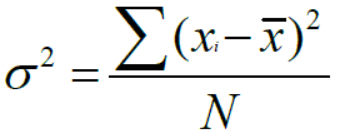

In [22]:
# variancia calculada em cima do retorno anual log de toda a carteira
variancia = retorno_anual_log.var()
variancia

retorno    4250.405338
dtype: float64

In [23]:
# variancia dos preços das ações
# dos ultimos 30 dias
dias = 30
carteira1.tail(dias).var()

GOL      2.742441
CVC      0.772609
WEGE    61.104167
MGLU     0.498107
TOTS     1.606838
BOVA     9.712122
dtype: float64

In [24]:
dias = 60
carteira1.tail(dias).var()

GOL     10.673253
CVC      9.028341
WEGE    36.382450
MGLU     1.029426
TOTS     1.649272
BOVA    67.719712
dtype: float64

In [25]:
dias = 330
carteira1.tail(dias).var()

GOL      82.117620
CVC     195.952219
WEGE    392.457352
MGLU     33.367755
TOTS     15.870652
BOVA    160.767249
dtype: float64

## Desvio padrao

O Desvio padrão é a raiz quadrada da variância


In [26]:
# a raiz quadrada pode ser calculada elevando o valor a 1/2, por exemplo
variancia ** 0.5

retorno    65.195133
dtype: float64

In [27]:
# Desvio padrao calculado em cima do retorno anual log
retorno_anual_log.std()

retorno    65.195133
dtype: float64

In [28]:
# tambem podemos calcular o desvio padrao dos valores das ações
# dos ultimos 30 dias
dias = 30
carteira1.tail(dias).std()

GOL     1.656032
CVC     0.878982
WEGE    7.816915
MGLU    0.705767
TOTS    1.267611
BOVA    3.116428
dtype: float64

In [29]:
dias = 60
carteira1.tail(dias).std()

GOL     3.266994
CVC     3.004720
WEGE    6.031787
MGLU    1.014606
TOTS    1.284240
BOVA    8.229199
dtype: float64

In [30]:
dias = 330
carteira1.tail(dias).std()

GOL      9.061877
CVC     13.998293
WEGE    19.810536
MGLU     5.776483
TOTS     3.983799
BOVA    12.679403
dtype: float64

## Coeficiente de variação

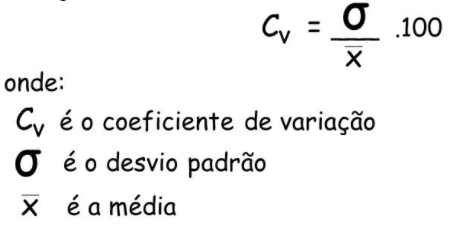

In [31]:
cv = round((retorno_anual_log.std() / retorno_anual_log.mean()) * 100, 2)
cv

retorno    301.12
dtype: float64

In [32]:
(carteira1.std() / carteira1.mean()) * 100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



GOL      68.606203
CVC      49.625554
WEGE     76.465026
MGLU    130.502309
TOTS     43.531580
BOVA     28.432064
dtype: float64

## Risco médio anual

In [33]:
taxa_retorno_diario = retorno_diario(carteira1)
taxa_retorno_diario

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2015-01-05,-0.933952,-1.315788,0.681821,1.879197,-3.072620,-1.988994
2015-01-06,2.424240,-1.333332,-1.483390,-1.317525,-6.253598,0.561317
2015-01-07,-4.339249,-0.878379,-1.145667,3.338001,-0.707045,3.370545
2015-01-08,-1.924397,-3.544652,1.688740,-0.775193,2.321983,0.747657
2015-01-09,-1.541698,-1.060068,-0.455871,-3.385414,-1.028742,-2.020201
...,...,...,...,...,...,...
2021-01-15,-2.809919,-2.896417,-2.392346,0.547834,0.461317,-2.730404
2021-01-18,1.147961,1.921128,5.118557,2.472758,1.730836,0.783341
2021-01-19,-2.311900,-1.438487,-2.830496,-1.513296,2.500004,-0.905803


In [34]:
# Desvio padrao de todo o periodo
taxa_retorno_diario.std()

GOL     5.133100
CVC     3.477394
WEGE    2.232294
MGLU    4.174479
TOTS    2.438637
BOVA    1.716316
dtype: float64

In [35]:
# Desvio padrao do ano de 2020
taxa_retorno_diario.loc['2020'].std()

GOL     7.199616
CVC     6.853447
WEGE    3.710984
MGLU    4.507233
TOTS    3.858313
BOVA    2.788449
dtype: float64

## Correlação das ações

In [36]:
# Corvariancia entre as ações
taxa_retorno_diario.cov()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
GOL,26.348715,9.025885,3.548305,6.839408,3.840190,5.192455
CVC,9.025885,12.092271,2.362768,4.632380,2.575990,3.320463
WEGE,3.548305,2.362768,4.983137,2.751120,2.097737,2.041214
MGLU,6.839408,4.632380,2.751120,17.426278,2.942115,3.226201
TOTS,3.840190,2.575990,2.097737,2.942115,5.946952,2.020028
BOVA,5.192455,3.320463,2.041214,3.226201,2.020028,2.945742


In [37]:
# Taxa de correlação entre as ações

taxa_retorno_diario.corr()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
GOL,1.000000,0.505657,0.309663,0.319181,0.306779,0.589380
CVC,0.505657,1.000000,0.304380,0.319116,0.303769,0.556349
WEGE,0.309663,0.304380,1.000000,0.295227,0.385347,0.532770
MGLU,0.319181,0.319116,0.295227,1.000000,0.289008,0.450290
TOTS,0.306779,0.303769,0.385347,0.289008,1.000000,0.482628
BOVA,0.589380,0.556349,0.532770,0.450290,0.482628,1.000000


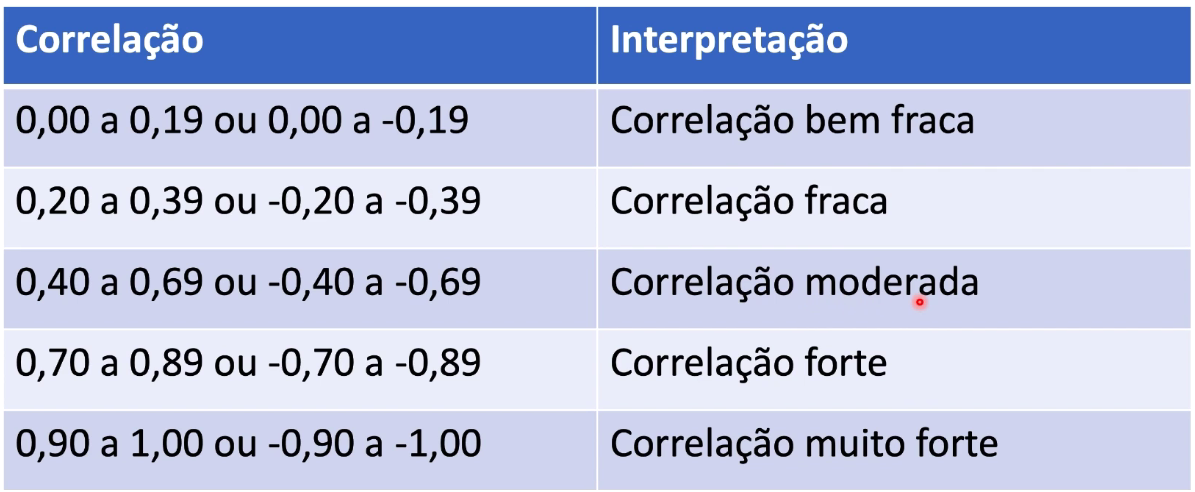

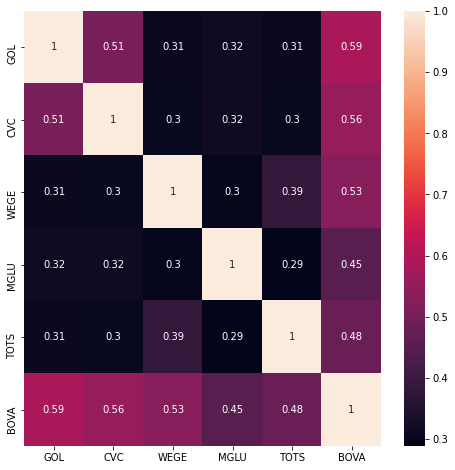

In [38]:
plt.figure(figsize=(8,8))
sns.heatmap(taxa_retorno_diario.corr(), annot=True);

## Calculando o risco do portfólio

In [64]:
retornos = taxa_retorno_diario.iloc[:, :5]
retornos

,GOL,CVC,WEGE,MGLU,TOTS
Date,,,,,
2015-01-05,-0.933952,-1.315788,0.681821,1.879197,-3.072620
2015-01-06,2.424240,-1.333332,-1.483390,-1.317525,-6.253598
2015-01-07,-4.339249,-0.878379,-1.145667,3.338001,-0.707045
2015-01-08,-1.924397,-3.544652,1.688740,-0.775193,2.321983
2015-01-09,-1.541698,-1.060068,-0.455871,-3.385414,-1.028742
...,...,...,...,...,...
2021-01-15,-2.809919,-2.896417,-2.392346,0.547834,0.461317
2021-01-18,1.147961,1.921128,5.118557,2.472758,1.730836
2021-01-19,-2.311900,-1.438487,-2.830496,-1.513296,2.500004





```
Deixarei um link com um artigo explicando como calcular o risco de uma
carteira de ativos
```
---
segue o [link](https://www.topinvest.com.br/risco-de-carteira/#:~:text=Para%20poder%20mensurar%20o%20risco,ativo%20na%20carteira(w).)

In [66]:
# covariancia dos ativos multiplicado pelos pesos
  # risco de retorno anual
dias = 246 # equivale a um ano em dias uteis
pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
np.dot((retornos.cov()) * dias, pesos) / 100 # dividi por 100 pra transformar em porcentagem

array([24.40443108, 15.09913278,  7.74558896, 17.01892012,  8.56226747])

In [70]:
#covariancia de toda a carteira ou simplesmente variancia da carteira
np.dot(pesos, np.dot(retornos.cov() * 246, pesos)) / 100 # dividi por 100 pra transformar em porcentagem

14.566068080303092

In [69]:
# raiz quadrada da cov de toda a carteira, que é o risco em porcentagem, ou volatilidade
math.sqrt(np.dot(pesos, np.dot(retornos.cov() * 246, pesos)))

38.16551857410442

### Função para calcular o risco de uma carteira

In [106]:
def volatilidade_carteira(carteira, pesos, dias):
  '''
  carteira: carteira de ativos com os valores
  pesos: pesos de cada ativo na carteira
  retorna a volatilidade em porcentagem
  '''
  if pesos.sum() != 1:
    return str('A soma dos pesos precisa ser 1')
  retornos = retorno_diario(carteira)
  risco = math.sqrt(np.dot(pesos, np.dot(retornos.cov() * dias, pesos)))
  risco = round(risco, 2)
  return risco

dias = 246
pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0])
teste_risco = volatilidade_carteira(carteira1, pesos, dias)
teste_risco

38.17

In [107]:
#Vamos verificar volatilidade da Bova
pesosBOVA = np.zeros(5)
pesosBOVA = np.concatenate((pesosBOVA, [1]))

volatilidade_carteira(carteira1, pesosBOVA, dias)

26.92

## Risco sistemático e não sistemático

### Função: Risco não sistemático


---


```
Link para entender um pouco mais sobre o que é e como calcular o 
risco sistemattico e não sistematico
```

segue o [link](https://www.topinvest.com.br/risco-sistemico-e-nao-sistemico/)



In [119]:
def risco_n_sistematico(df_retorno_diario, pesos, dias):  
  df_retorno_diario = df_retorno_diario / 100
  variancia = ((df_retorno_diario.var() * 246) * pesos) 
  aux = variancia[0]
  for i in range(1,len(variancia)):
    aux = aux - variancia[i]
  
  covariancia = np.dot(pesos, np.dot(df_retorno_diario.cov() * dias, pesos)) 
  return round(covariancia - aux, 2)

dias = 246
pesos = np.zeros(5) + 2
pesos = np.concatenate((pesos, [0.]))
print(pesos)
teste_func = risco_n_sistematico(taxa_retorno_diario, pesos, dias)
teste_func

[2. 2. 2. 2. 2. 0.]


15.26

In [121]:
#Vamos verificar o risco nao sistematico da Bova
pesosBOVA = np.zeros(5)
pesosBOVA = np.concatenate((pesosBOVA, [1]))
print(pesosBOVA)
teste_func = risco_n_sistematico(taxa_retorno_diario, pesosBOVA, dias)
teste_func

[0. 0. 0. 0. 0. 1.]


0.14